In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
SEED = 1234

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
all_data = pd.concat([train, test])

# Check Missing Values

In [4]:
all_data.isnull().sum()

id                   0
age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income            6512
dtype: int64

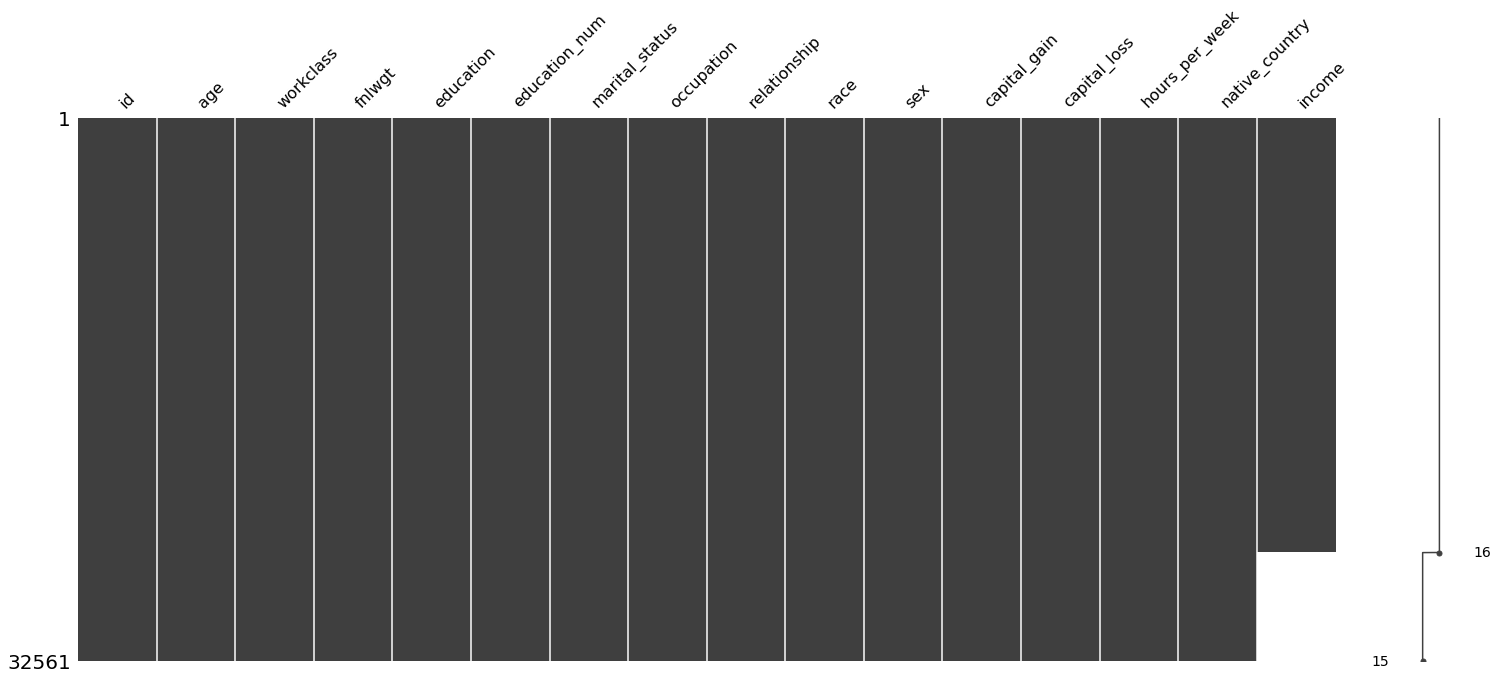

In [5]:
msno.matrix(all_data)

# Feature Overview

In [6]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [8]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [9]:
train.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,26049,26049,26049,26049,26049,26049,26049,26049,26049
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,18123,8433,11970,3304,10541,22315,17482,23371,19744


In [10]:
train.sample(5, random_state=SEED)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16141,16141,42,Local-gov,100793,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
7572,7572,49,Private,44434,Some-college,10,Divorced,Tech-support,Other-relative,White,Male,0,0,35,United-States,<=50K
3935,3935,22,Private,211361,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,30,United-States,<=50K
17510,17510,21,Private,460835,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,45,United-States,<=50K
12627,12627,41,Private,106900,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,42,United-States,>50K


In [11]:
train['income'] = (train['income'] != '<=50K').astype('int')

In [12]:
train.corr().style.background_gradient(cmap='coolwarm')

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
id,1.000000,0.007866,-0.001191,0.002309,0.007228,-0.002553,0.005749,0.004350
age,0.007866,1.000000,-0.076618,0.040107,0.077768,0.057875,0.066038,0.229292
fnlwgt,-0.001191,-0.076618,1.000000,-0.046377,0.000953,-0.008689,-0.020064,-0.007500
education_num,0.002309,0.040107,-0.046377,1.000000,0.119382,0.074813,0.146063,0.334582
capital_gain,0.007228,0.077768,0.000953,0.119382,1.000000,-0.032030,0.080543,0.225296
capital_loss,-0.002553,0.057875,-0.008689,0.074813,-0.032030,1.000000,0.054957,0.152537
hours_per_week,0.005749,0.066038,-0.020064,0.146063,0.080543,0.054957,1.000000,0.233726
income,0.004350,0.229292,-0.007500,0.334582,0.225296,0.152537,0.233726,1.000000


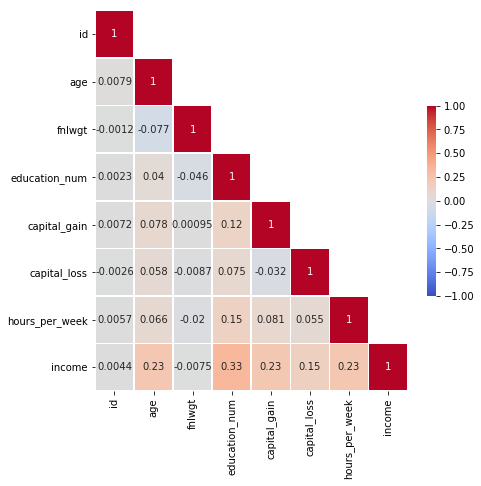

In [13]:
fig, ax = plt.subplots(figsize=(7,7))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(train.corr(), 
            cmap = 'coolwarm', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

# 0. Income: Target Value

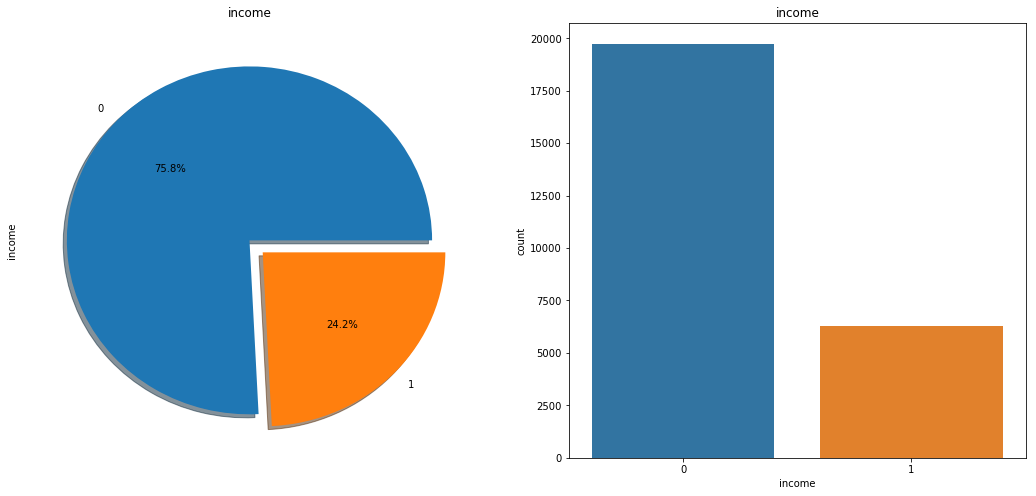

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['income'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('income')

sns.countplot('income', data=train, ax=ax[1])
ax[1].set_title('income')
plt.show()

# 1. ID : Not A Feature &#8594; Drop

In [15]:
all_data.drop('id', axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,NaN
6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,NaN
6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,NaN
6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,NaN


# 2. Age

In [16]:
train['age'].describe()

count    26049.000000
mean        38.569235
std         13.671489
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

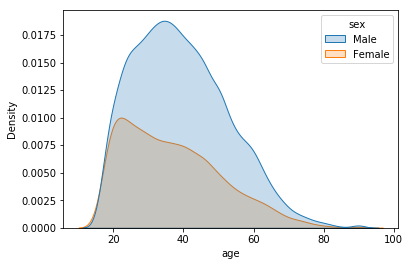

In [17]:
sns.kdeplot(x='age', hue='sex', fill=True, data=train)

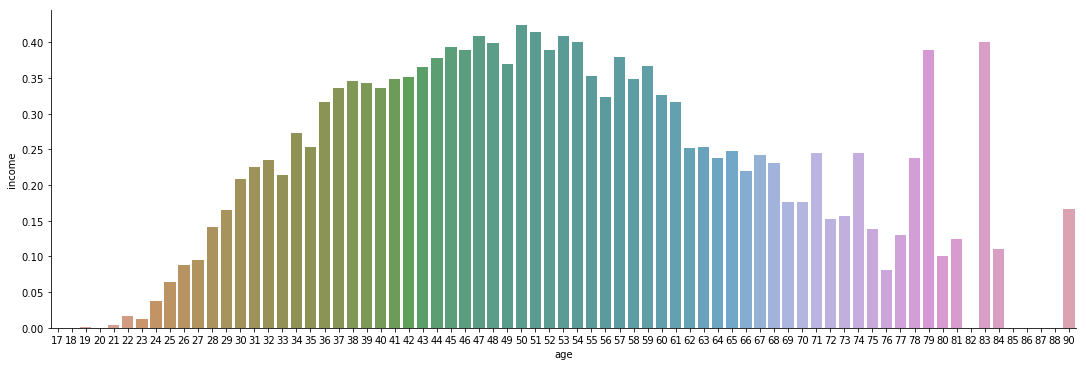

In [18]:
sns.catplot(x="age", y="income",
                data=train, saturation=0.5,
                kind="bar", ci=None, aspect=3)

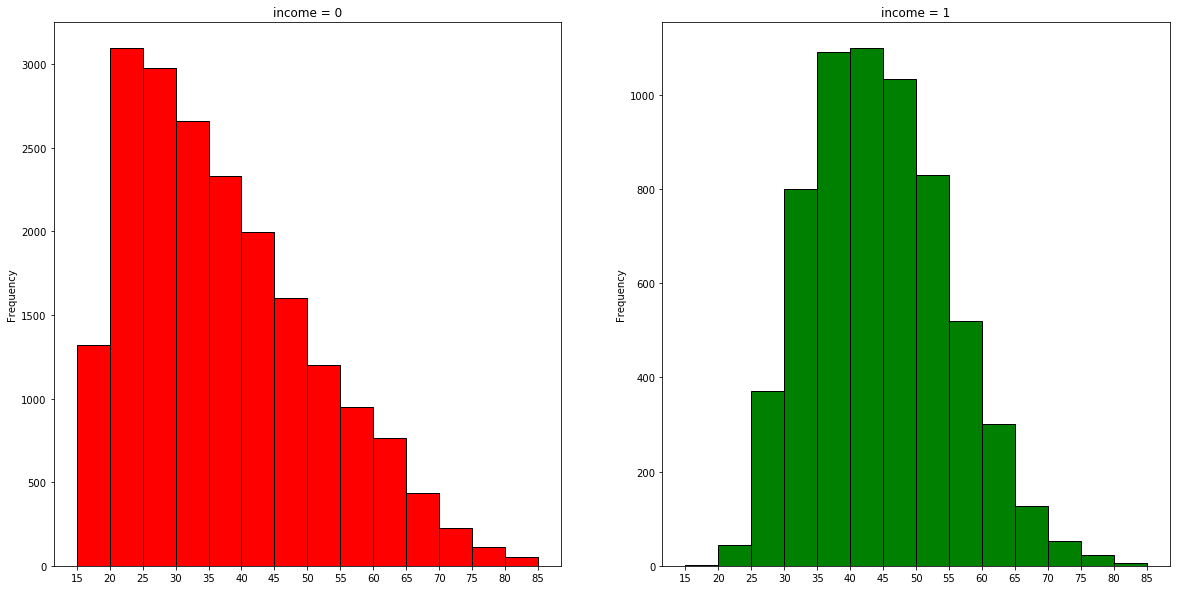

In [19]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

x = list(range(15,90,5))

train[train['income']==0].age.plot.hist(ax=ax[0],bins=x, edgecolor='black',color='red')
train[train['income']==1].age.plot.hist(ax=ax[1], bins=x, edgecolor='black', color='green')

ax[0].set_title('income = 0')
ax[1].set_title('income = 1')
ax[0].set_xticks(x)
ax[1].set_xticks(x)
plt.show()

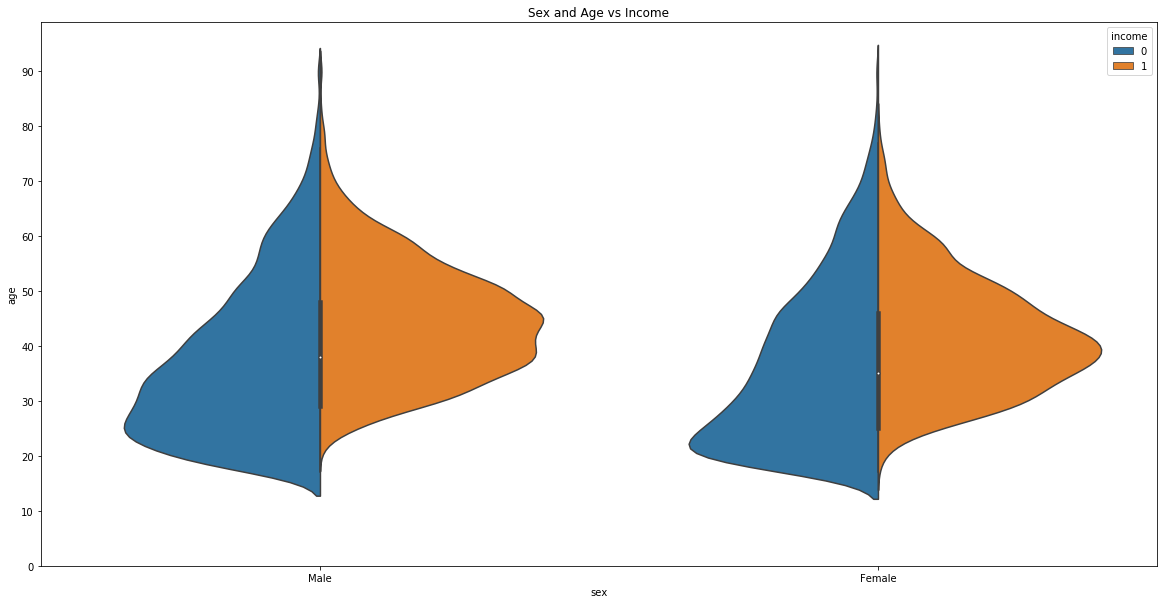

In [20]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.violinplot("sex","age", hue="income", data=train,split=True,ax=ax)
ax.set_title('Sex and Age vs Income')
ax.set_yticks(range(0,100,10))
plt.show()

# 3. Workclass

In [21]:
train['workclass'].unique()

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [22]:
train['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [23]:
pd.crosstab(train.workclass, train.income, margins=True).T.style.background_gradient(cmap='summer_r')

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
income,,,,,,,,,,
0,1349,473,1187,6,14130,381,1453,754,11,19744
1,153,292,505,0,3993,496,577,289,0,6305
All,1502,765,1692,6,18123,877,2030,1043,11,26049


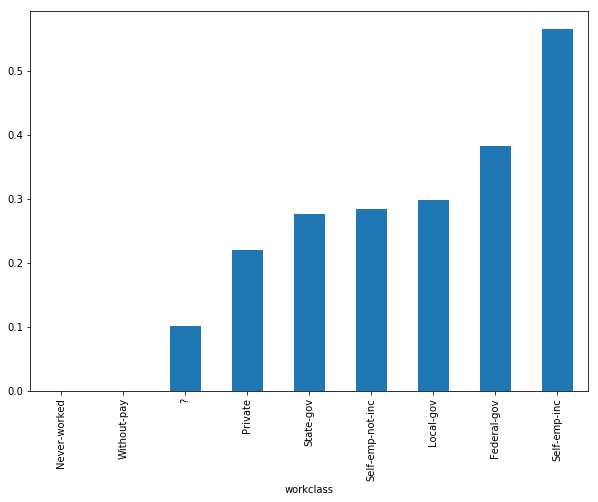

In [24]:
train.groupby('workclass')['income'].mean().sort_values().plot(kind='bar', figsize=(10,7))

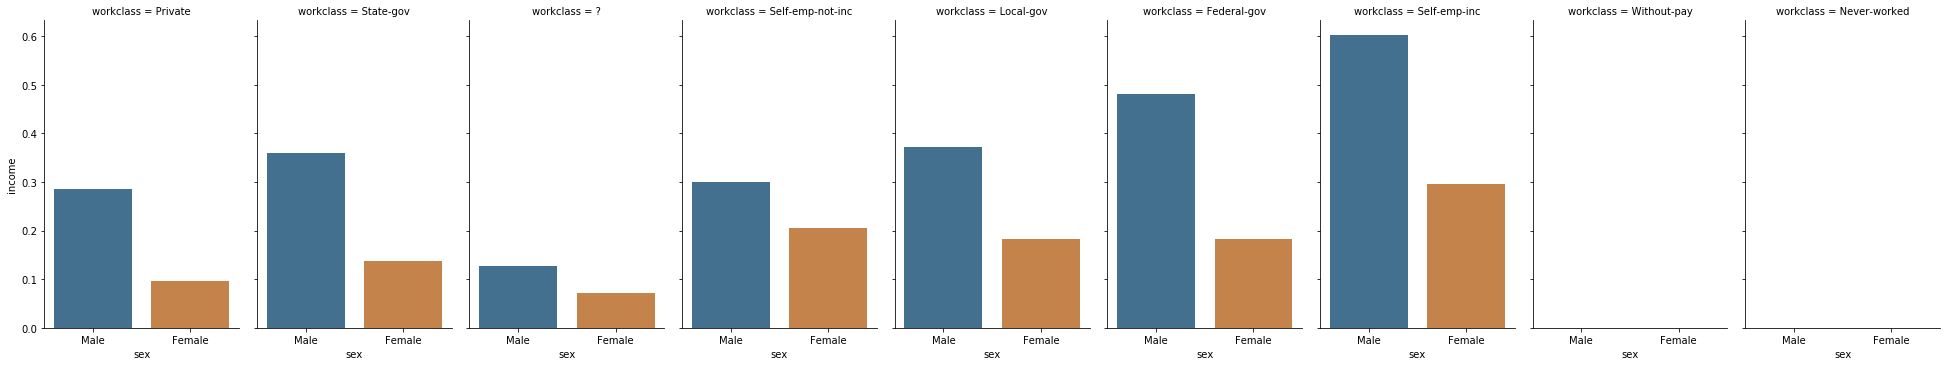

In [25]:
sns.catplot(x="sex", y="income", col="workclass",
                data=train, saturation=.5,
                kind="bar", ci=None, aspect=.6)

# 4. Education Num

In [26]:
train['education_num'].describe()

count    26049.000000
mean        10.088372
std          2.567610
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_num, dtype: float64

In [27]:
pd.crosstab(train.education_num, train.income, margins=True).T.style.background_gradient(cmap='summer_r')

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
income,,,,,,,,,,,,,,,,,
0,40,129,252,476,396,678,867,333,7096,4683,816,627,2539,604,124,84,19744
1,0,5,13,29,22,53,55,26,1337,1117,280,215,1805,774,342,232,6305
All,40,134,265,505,418,731,922,359,8433,5800,1096,842,4344,1378,466,316,26049


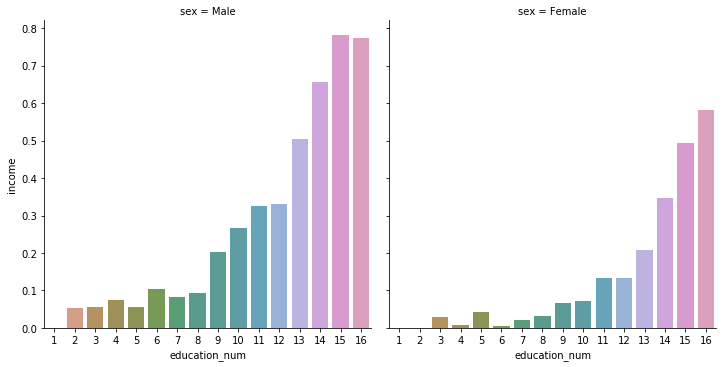

In [28]:
sns.catplot(x="education_num", y="income", col="sex",
                data=train, saturation=.5,
                kind="bar", ci=None, aspect=1)

# 5. Capital gain & loss

In [29]:
train['capital_gain'].describe()

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64

Text(0.5,1,'income=1')

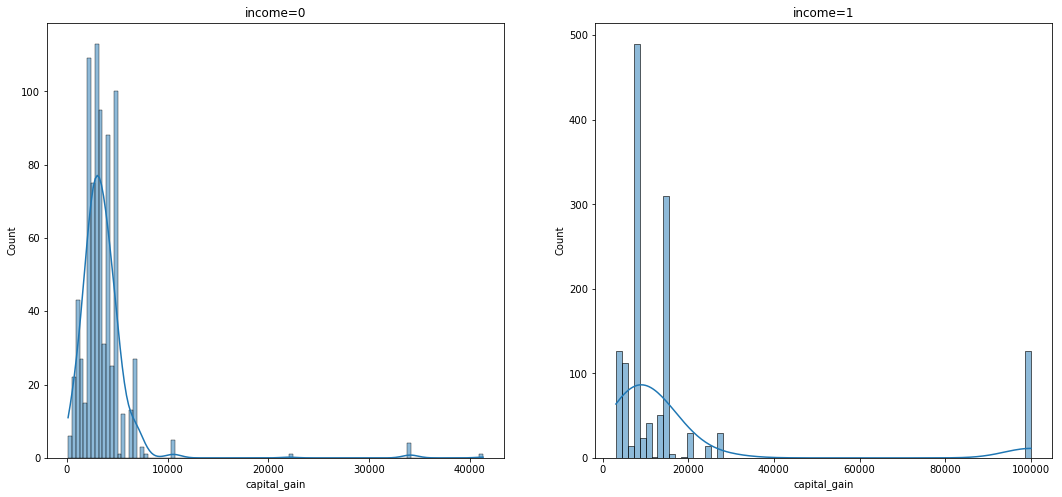

In [30]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.histplot(train.loc[ (train['capital_gain'] > 0) & (train['income'] == 0), 'capital_gain'], kde=True, ax=ax[0])
sns.histplot(train.loc[ (train['capital_gain'] > 0) & (train['income'] == 1), 'capital_gain'], kde=True, ax=ax[1])
ax[0].set_title('income=0')
ax[1].set_title('income=1')

Text(0.5,1,'income=1')

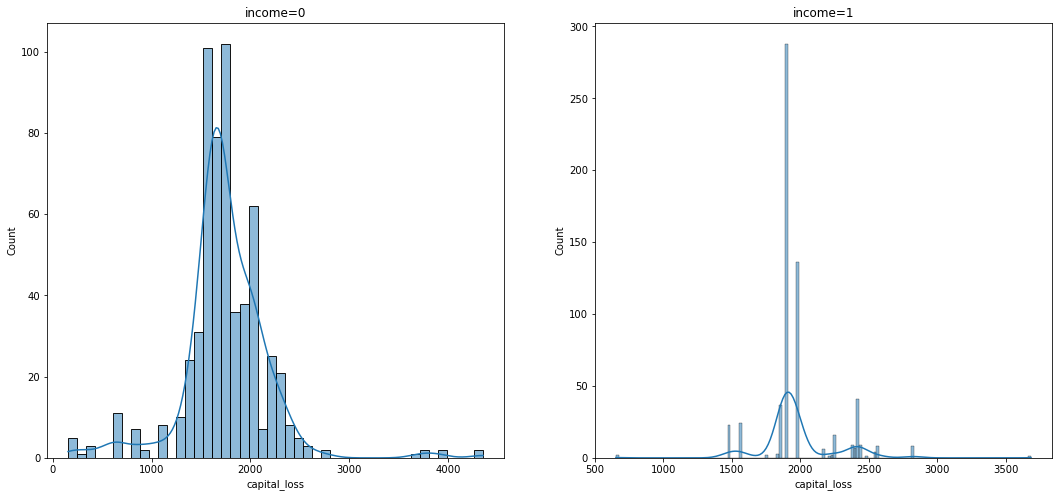

In [31]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.histplot(train.loc[ (train['capital_loss'] > 0) & (train['income'] == 0), 'capital_loss'], kde=True, ax=ax[0])
sns.histplot(train.loc[ (train['capital_loss'] > 0) & (train['income'] == 1), 'capital_loss'], kde=True, ax=ax[1])
ax[0].set_title('income=0')
ax[1].set_title('income=1')

In [32]:
train['capital_net'] = train['capital_gain'] - train['capital_loss']

In [33]:
train[train['capital_net'] == 0].count()

id                22630
age               22630
workclass         22630
fnlwgt            22630
education         22630
education_num     22630
marital_status    22630
occupation        22630
relationship      22630
race              22630
sex               22630
capital_gain      22630
capital_loss      22630
hours_per_week    22630
native_country    22630
income            22630
capital_net       22630
dtype: int64

In [34]:
train.loc[(train['income'] == 0), 'capital_net'].describe()

count    19744.00000
mean        94.02345
std        995.73002
min      -4356.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      41310.00000
Name: capital_net, dtype: float64

In [35]:
train.loc[(train['income'] == 1), 'capital_net'].describe()

count     6305.000000
mean      3836.872324
std      14605.534943
min      -3683.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_net, dtype: float64

Text(0.5,1,'income=1')

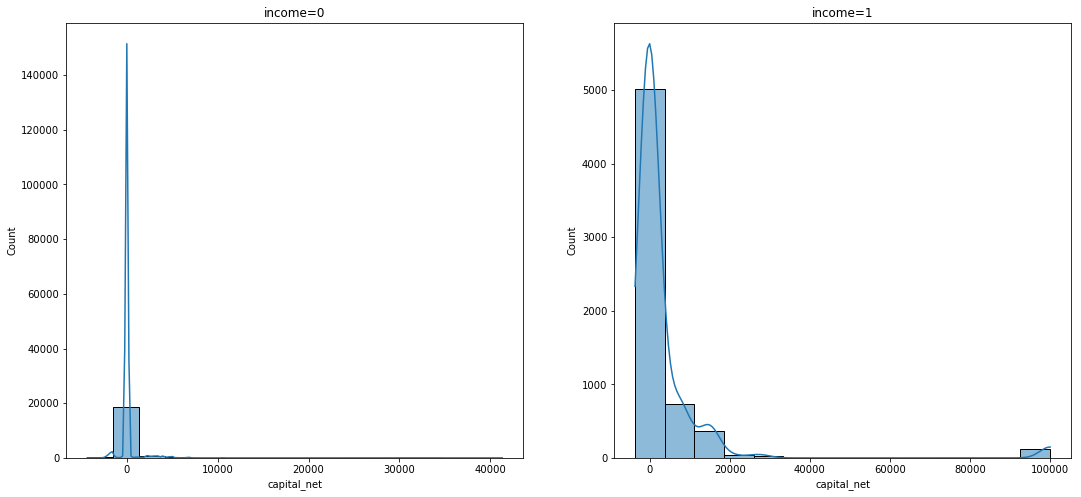

In [36]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.histplot(train.loc[(train['income'] == 0), 'capital_net'], kde=True, ax=ax[0])
sns.histplot(train.loc[(train['income'] == 1), 'capital_net'], kde=True, ax=ax[1])
ax[0].set_title('income=0')
ax[1].set_title('income=1')

In [37]:
train.loc[(train['income'] == 1) & (train['capital_net'] > 0), 'capital_net'].quantile(0.1)

4787.0

In [38]:
train.loc[(train['income'] == 0) & (train['capital_net'] > 0), 'capital_net'].quantile(0.9)

5013.0

# 6. Hours per week

In [41]:
train['hours_per_week'].describe()

count    26049.000000
mean        40.443126
std         12.361850
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

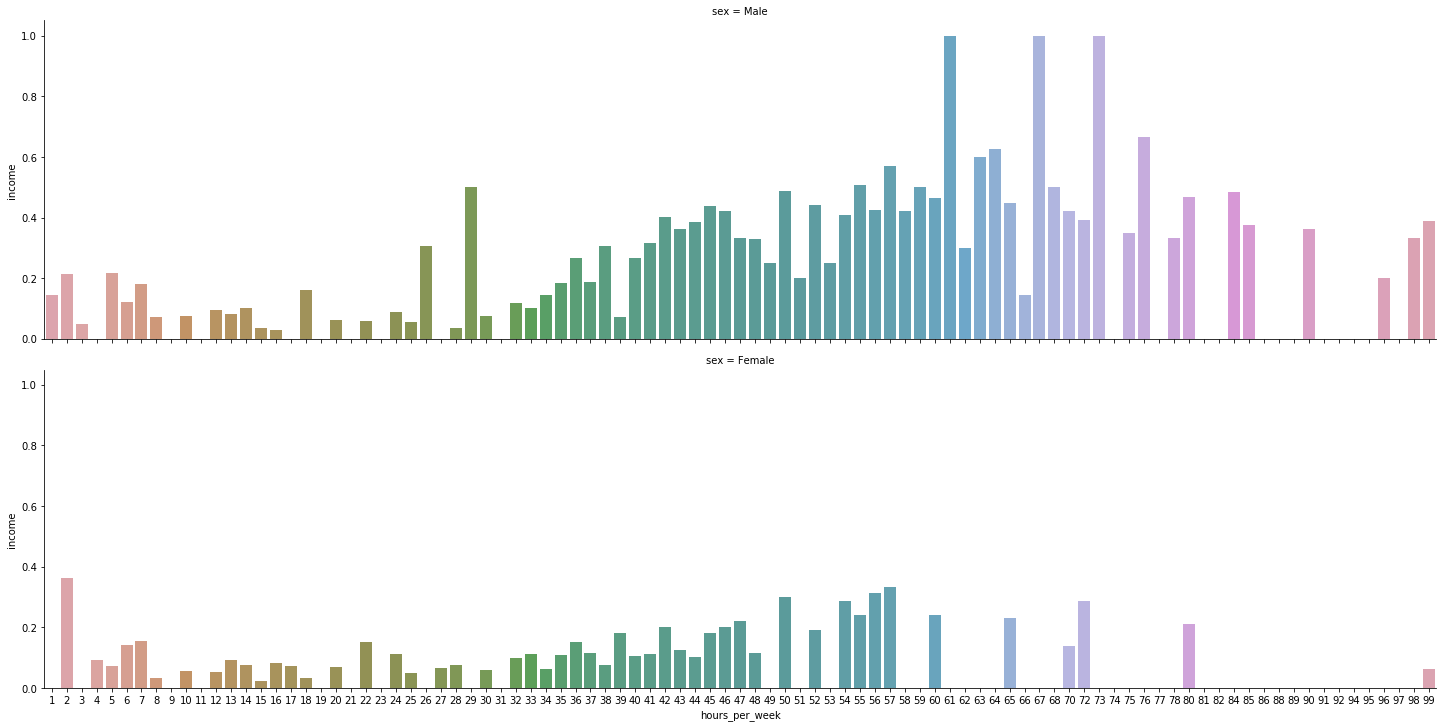

In [64]:
sns.catplot(x="hours_per_week", y="income", row="sex",
                data=train, saturation=.5,
                kind="bar", ci=None, aspect=4)

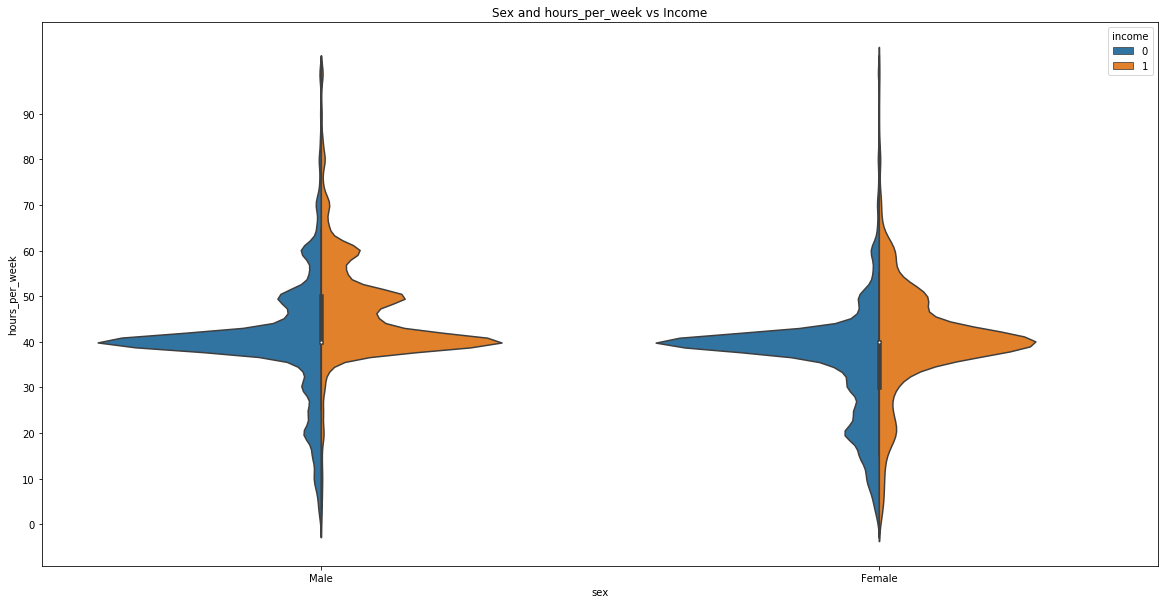

In [60]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.violinplot("sex","hours_per_week", hue="income", data=train,split=True,ax=ax)
ax.set_title('Sex and hours_per_week vs Income')
ax.set_yticks(range(0,100,10))
plt.show()

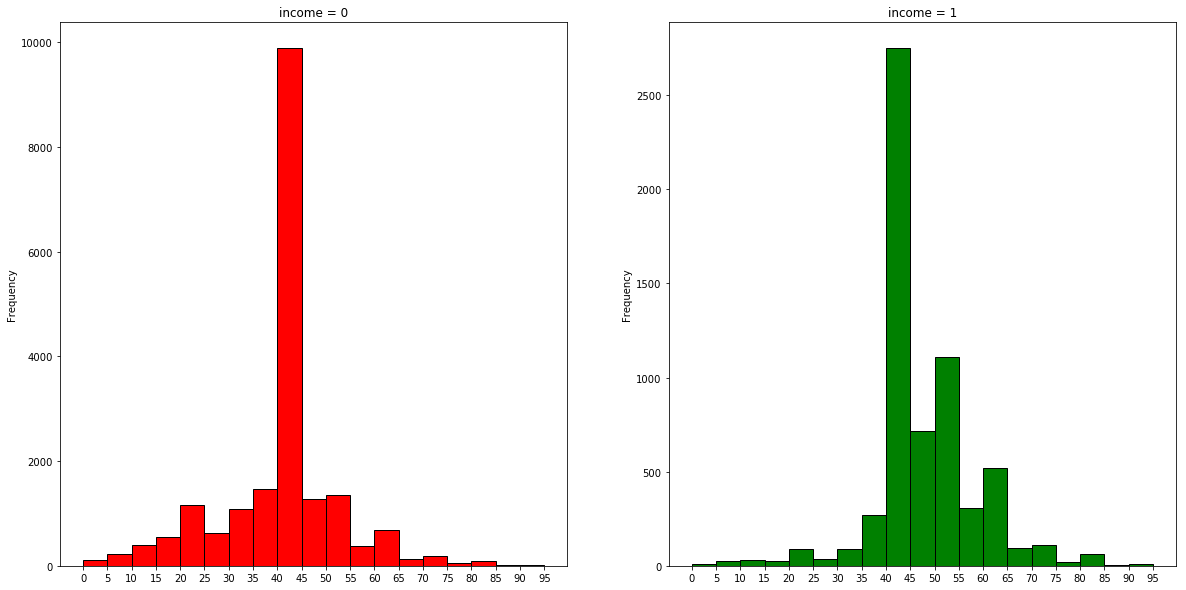

In [55]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

x = list(range(0,100,5))

train[train['income']==0].hours_per_week.plot.hist(ax=ax[0],bins=x, edgecolor='black',color='red')
train[train['income']==1].hours_per_week.plot.hist(ax=ax[1], bins=x, edgecolor='black', color='green')

ax[0].set_title('income = 0')
ax[1].set_title('income = 1')
ax[0].set_xticks(x)
ax[1].set_xticks(x)
plt.show()

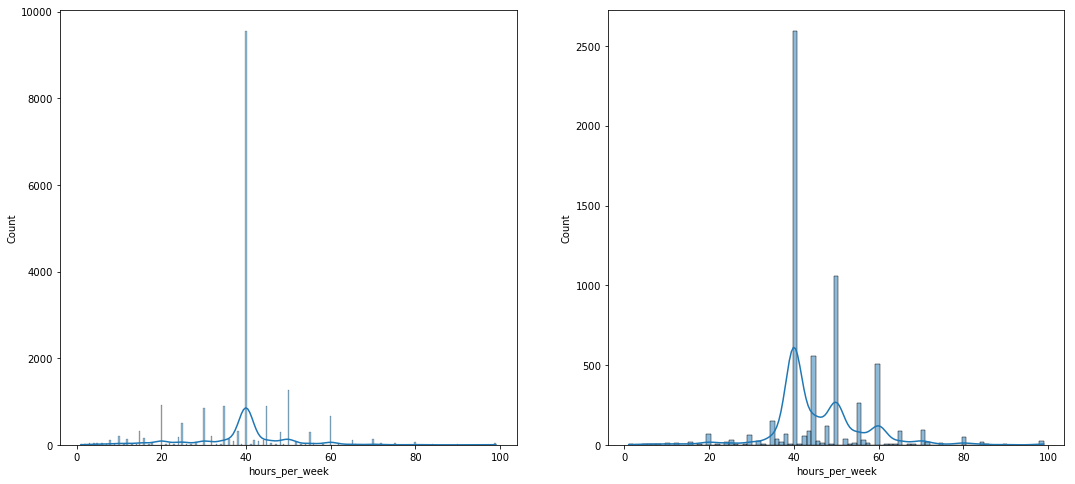

In [58]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.histplot(train.loc[(train['income'] == 0), 'hours_per_week'], kde=True, ax=ax[0])
sns.histplot(train.loc[(train['income'] == 1), 'hours_per_week'], kde=True, ax=ax[1])